In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications import inception_v3
from sklearn.metrics import accuracy_score,confusion_matrix

Using TensorFlow backend.


In [3]:
CurrentDir = os.getcwd()
CurrentDir

'C:\\Users\\thaku\\OneDrive\\Desktop\\Insofe Internship\\Task 4\\brain_tumor'

In [4]:
TrainDir = os.path.join(CurrentDir,"Train")
TestDir = os.path.join(CurrentDir,"Test")

In [5]:
DataGen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [6]:
TrainSet = DataGen.flow_from_directory(TrainDir,target_size=(299,299), batch_size=32,class_mode="categorical")
TestSet = DataGen.flow_from_directory(TestDir,target_size=(299,299), batch_size=32,class_mode="categorical")

Found 253 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [7]:
model = inception_v3.InceptionV3(include_top=False,input_shape=(299,299,3))

In [8]:
for layer in model.layers:
    layer.trainable = False

In [9]:
x = Flatten()(model.output)
predictions = Dense(len(os.listdir(TrainDir)),activation="softmax")(x)
model = Model(model.input,predictions)

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(TrainSet,validation_data=TestSet, steps_per_epoch=len(TrainSet), validation_steps=len(TestSet), epochs=2)

Epoch 1/2
8/8 [==============================] - 117s 15s/step - loss: 11.5747 - accuracy: 0.5850 - val_loss: 0.5000 - val_accuracy: 0.8750
Epoch 2/2
8/8 [==============================] - 95s 12s/step - loss: 5.1999 - accuracy: 0.6877 - val_loss: 1.3816 - val_accuracy: 0.8125


In [12]:
test_preds = model.predict(TestSet)

In [13]:
test_preds

array([[7.99227394e-07, 9.99999166e-01],
       [1.00000000e+00, 8.19312202e-14],
       [9.67175816e-04, 9.99032855e-01],
       [1.00000000e+00, 5.62537706e-21],
       [9.99998569e-01, 1.40532222e-06],
       [1.00000000e+00, 4.18715382e-13],
       [2.83656670e-16, 1.00000000e+00],
       [1.00000000e+00, 1.09132436e-09],
       [1.00000000e+00, 3.15603620e-11],
       [8.36682734e-16, 1.00000000e+00],
       [5.87979110e-10, 1.00000000e+00],
       [1.00000000e+00, 4.15835850e-13],
       [9.75489080e-01, 2.45108809e-02],
       [9.99998927e-01, 1.11448060e-06],
       [1.00000000e+00, 1.04696568e-12],
       [9.99995828e-01, 4.21797131e-06],
       [8.97468448e-01, 1.02531545e-01],
       [1.00000000e+00, 1.30147824e-14],
       [9.73695099e-01, 2.63048802e-02],
       [7.53385248e-05, 9.99924660e-01],
       [1.27902344e-09, 1.00000000e+00],
       [1.00000000e+00, 1.39269386e-11],
       [9.98999774e-01, 1.00028329e-03],
       [1.19555702e-14, 1.00000000e+00],
       [9.137023

In [14]:
test_ind = np.argmax(test_preds, axis = 1)
test_ind

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

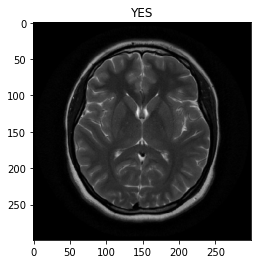

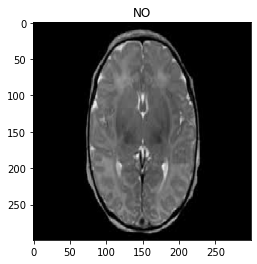

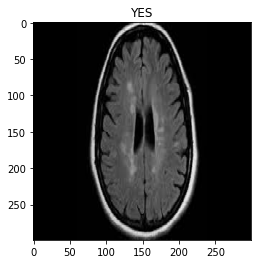

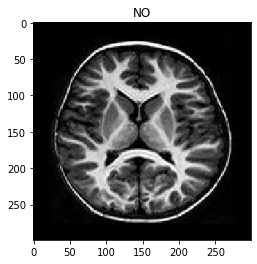

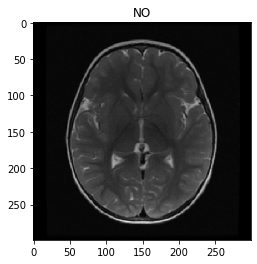

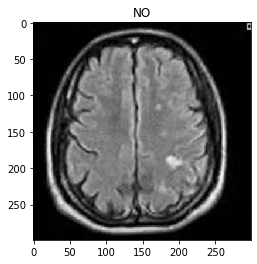

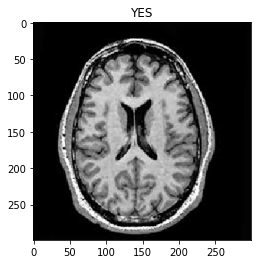

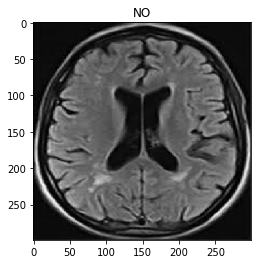

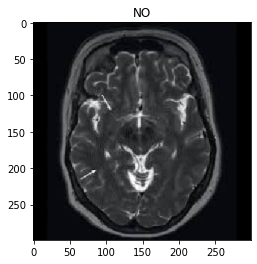

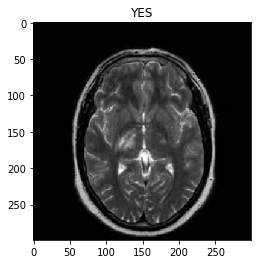

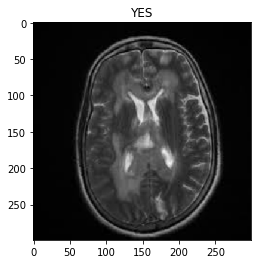

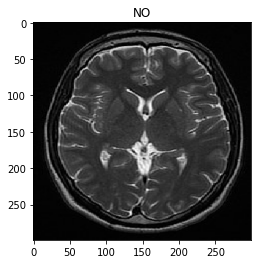

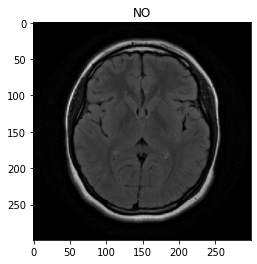

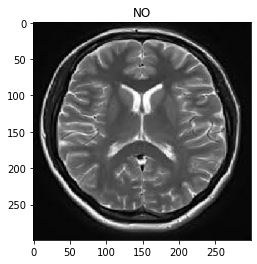

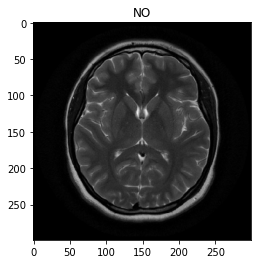

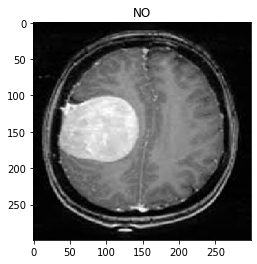

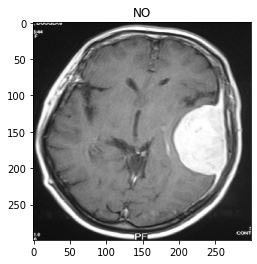

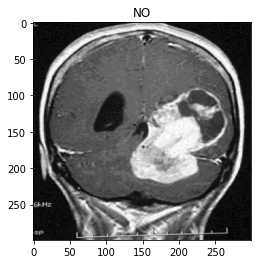

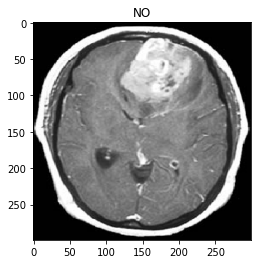

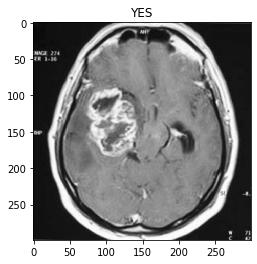

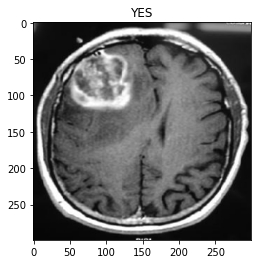

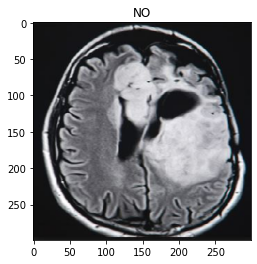

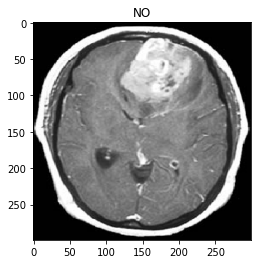

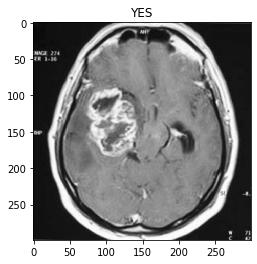

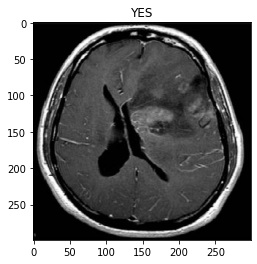

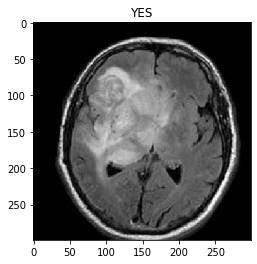

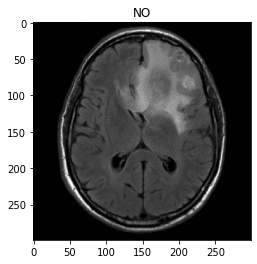

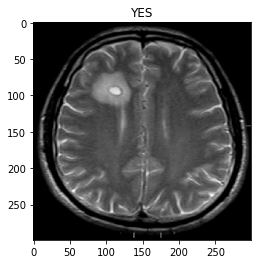

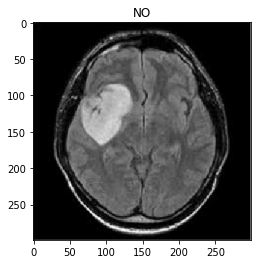

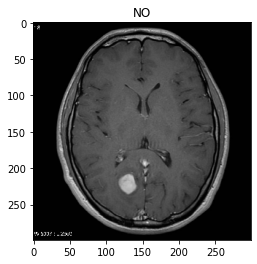

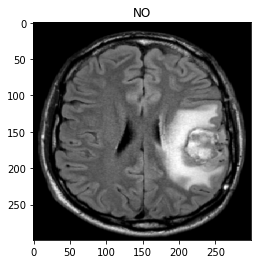

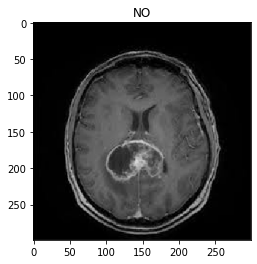

In [15]:
mapping = {0:"NO",1:"YES"}
k = 0
for i in os.listdir(TestDir):
    imageDir = os.path.join(TestDir,i)
    for j in os.listdir(imageDir):
        img = load_img(os.path.join(imageDir,j),target_size=(299,299))
        plt.imshow(img)
        plt.title(mapping[test_ind[k]])
        plt.show()
        k+=1

In [16]:
true_pred = []
k = 0
for i in os.listdir(TestDir):
    for j in os.listdir(os.path.join(TestDir,i)):
        if(k ==0):
            true_pred.append(0)
        else:
            true_pred.append(1)
    k+=1
    

In [17]:
true_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [18]:
print(accuracy_score(test_ind,true_pred))
print(confusion_matrix(test_ind,true_pred))

0.5
[[10 11]
 [ 5  6]]


In [34]:
#building cnn model and comparing results
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(224, 224, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))


model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2, activation='softmax'))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`


In [35]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [36]:
TrainSet = DataGen.flow_from_directory(TrainDir,target_size=(224,224), batch_size=32,class_mode="categorical")
TestSet = DataGen.flow_from_directory(TestDir,target_size=(224,224), batch_size=32,class_mode="categorical")

Found 253 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [37]:
model.fit(TrainSet,validation_data=TestSet, steps_per_epoch=len(TrainSet), validation_steps=len(TestSet), epochs=2)

Epoch 1/2
8/8 [==============================] - 78s 10s/step - loss: 22.6136 - accuracy: 0.5692 - val_loss: 1.6100 - val_accuracy: 0.5312
Epoch 2/2
8/8 [==============================] - 70s 9s/step - loss: 2.6049 - accuracy: 0.5771 - val_loss: 1.8862 - val_accuracy: 0.5312


In [38]:
test_pred=model.predict(TestSet)

In [39]:
test_ind = np.argmax(test_pred, axis = 1)

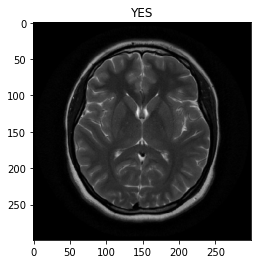

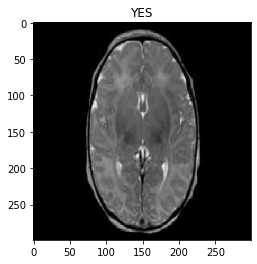

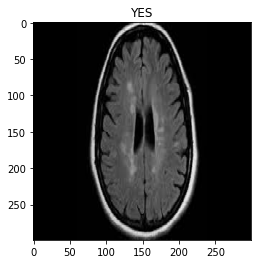

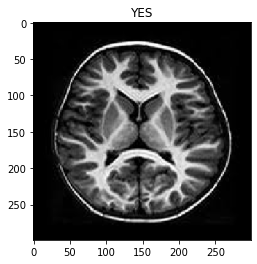

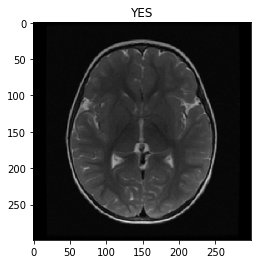

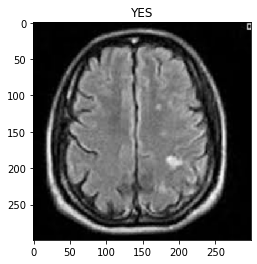

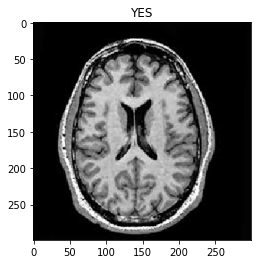

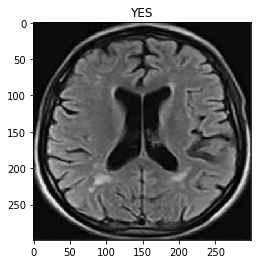

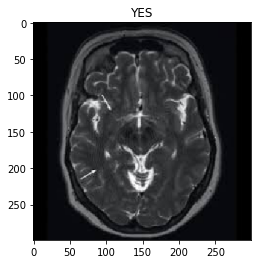

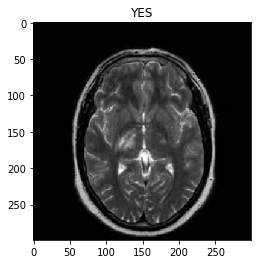

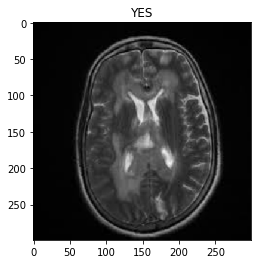

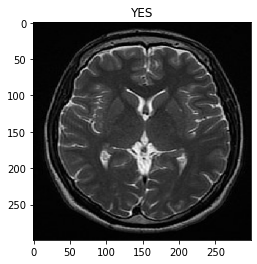

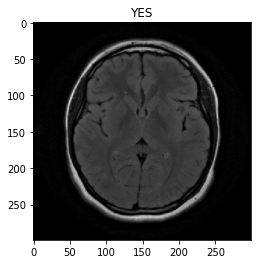

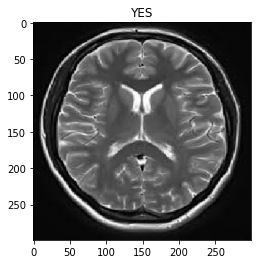

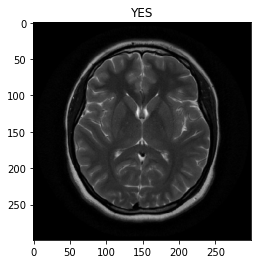

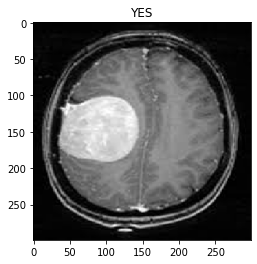

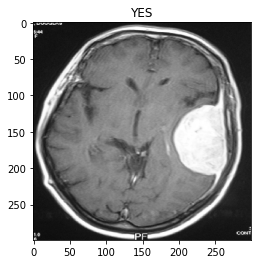

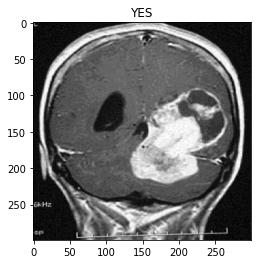

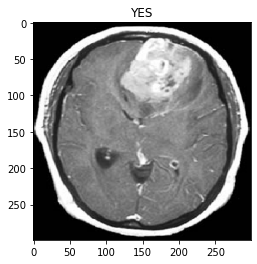

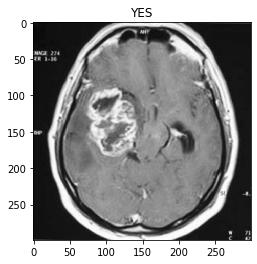

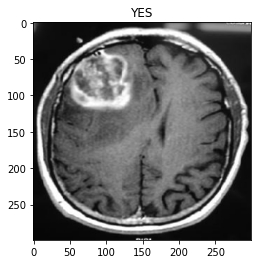

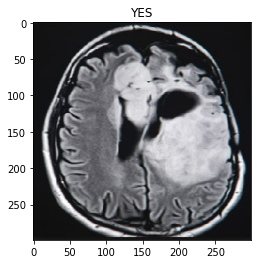

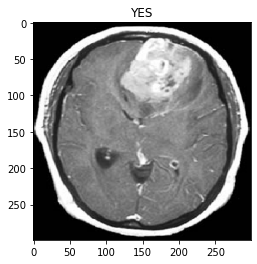

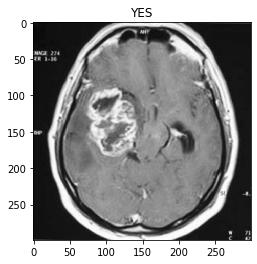

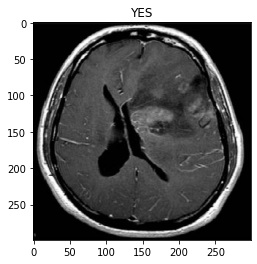

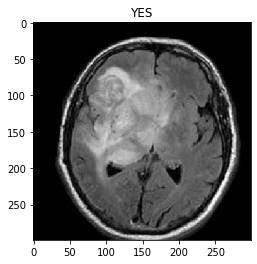

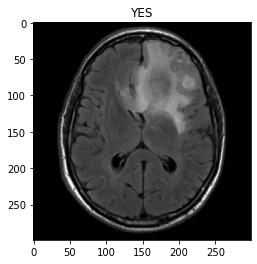

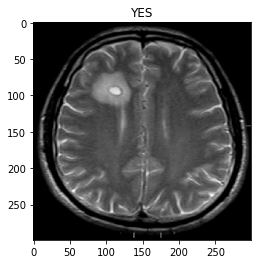

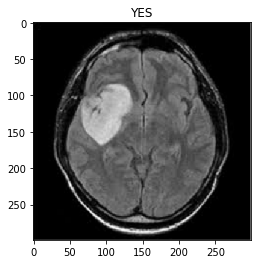

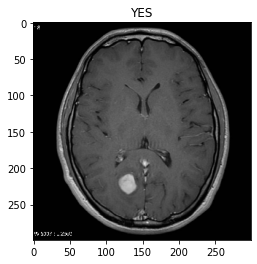

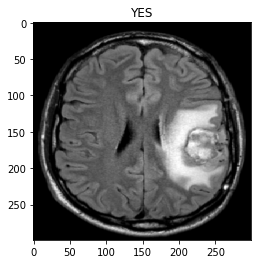

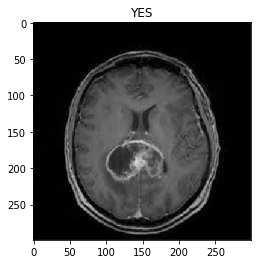

In [41]:
k = 0
for i in os.listdir(TestDir):
    img_dir = os.path.join(TestDir,i)
    for j in os.listdir(img_dir):
        img = load_img(os.path.join(img_dir,j),target_size=(299,299))
        plt.imshow(img)
        plt.title(mapping[test_ind[k]])
        plt.show()
        k+=1

In [42]:
true_pred = []
k = 0
for i in os.listdir(TestDir):
    for j in os.listdir(os.path.join(TestDir,i)):
        if(k ==0):
            true_pred.append(0)
        else:
            true_pred.append(1)
    k+=1

In [43]:
true_pred = np.array(true_pred)

In [45]:
print(accuracy_score(test_ind,true_pred))
print(confusion_matrix(test_ind,true_pred))

0.53125
[[ 0  0]
 [15 17]]
